In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from numpy import log as ln
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from linearmodels.datasets import wage_panel

In [2]:
df = pd.read_stata(r'C:\Users\kentj\Desktop\Old Modules\HE2023\project_data\land_registry_crime.dta')

In [3]:
df.head()

,price,postalcode,propertyty,age,duration,year,month,day,OA01CD,OA11CD,lsoacode,msoa11,transactiondates,quarter,yearquarter,bus_distnear,tube_distnear,thamesriv_dist,Bus_stopscount_200m,percent_noedu,percent_minorities,lone_hh,detached_dum,flat_dum,semi_d_dum,terrace_dum,freehold,leasehold,heritage_count_200m,Nearest_Park_dist,postcode,oslaua,lat,lon,LA,area_code,descriptio,hectares,code_year,la_name,grossannualpay,hoursworked,jobdensity,totalpopulation,unemployment,nid,dist_to_cbd,allcrime,violent_crime,propertycrime
0,900000,EC2Y 8BY,F,N,L,2010,4,30,E00000002,E00166756,E01000001,E02000001,2010-04-30,Q2,2010Q2,82.073138,194.082306,1034.553778,5,0.024631,0.233333,0.000000,0,1,0,0,0,1,0,607.711427,EC2Y8BY,E09000001,51.519901,-0.096798,City and County of the City of London,LAD,Local Authority District,314.942,E090000012010,City of London,52271.0,35.0,68.160004,7338,NaN,Trafalgar_square,2.535778,4,1,0
1,822500,EC2Y 8BY,F,N,L,2010,9,20,E00000002,E00166756,E01000001,E02000001,2010-09-20,Q3,2010Q3,82.073138,194.082306,1034.553778,5,0.024631,0.233333,0.000000,0,1,0,0,0,1,0,607.711427,EC2Y8BY,E09000001,51.519901,-0.096798,City and County of the City of London,LAD,Local Authority District,314.942,E090000012010,City of London,52271.0,35.0,68.160004,7338,NaN,Trafalgar_square,2.535778,4,1,0
2,820000,EC2Y 8DR,F,N,L,2010,9,24,E00000001,E00000001,E01000001,E02000001,2010-09-24,Q3,2010Q3,62.201286,308.145634,1082.123938,3,0.028902,0.097938,0.020202,0,1,0,0,0,1,1,480.472120,EC2Y8DR,E09000001,51.520279,-0.094923,City and County of the City of London,LAD,Local Authority District,314.942,E090000012010,City of London,52271.0,35.0,68.160004,7338,NaN,Trafalgar_square,2.668601,4,1,0
3,382500,EC1A 7BT,F,N,L,2010,3,29,E00000007,E00000007,E01000001,E02000001,2010-03-29,Q1,2010Q1,46.754679,185.806051,689.286979,7,0.000000,0.227642,0.024096,0,1,0,0,0,1,4,912.216366,EC1A7BT,E09000001,51.516857,-0.098178,City and County of the City of London,LAD,Local Authority District,314.942,E090000012010,City of London,52271.0,35.0,68.160004,7338,NaN,Trafalgar_square,2.290633,4,1,0
4,320000,EC2Y 8NE,F,N,L,2010,10,28,E00000008,E00166756,E01000001,E02000001,2010-10-28,Q4,2010Q4,29.206164,157.793459,1124.790457,4,0.024631,0.233333,0.000000,0,1,0,0,0,1,0,572.974046,EC2Y8NE,E09000001,51.520737,-0.097051,City and County of the City of London,LAD,Local Authority District,314.942,E090000012010,City of London,52271.0,35.0,68.160004,7338,NaN,Trafalgar_square,2.570692,4,1,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549813 entries, 0 to 549812
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   price                549813 non-null  int32         
 1   postalcode           549813 non-null  object        
 2   propertyty           549813 non-null  object        
 3   age                  549813 non-null  object        
 4   duration             549813 non-null  object        
 5   year                 549813 non-null  int16         
 6   month                549813 non-null  int8          
 7   day                  549813 non-null  int8          
 8   OA01CD               549813 non-null  object        
 9   OA11CD               549813 non-null  object        
 10  lsoacode             549813 non-null  object        
 11  msoa11               549813 non-null  object        
 12  transactiondates     549813 non-null  datetime64[ns]
 13  quarter       

### Let's take a look at price distribution since price will be our dependent variable.

Lowest price: $10000
Highest price: $54959000


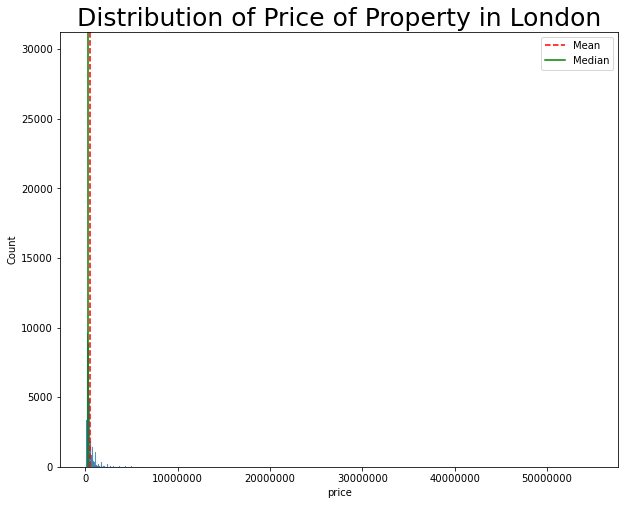

In [5]:
print('Lowest price: $' + str(df['price'].min()))
print('Highest price: $' + str(df['price'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of Price of Property in London',fontdict = {'fontsize': 25 })
mean=df['price'].mean()
median=df['price'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['price'])
plt.ticklabel_format(style='plain', axis='x')

#As expected, we are seeing an extremely long tailed, positively skewed distribution. 
#Therefore, we have to log our price variable. 

In [6]:
df['lnprice'] = ln(df['price'])

Lowest price: $9.210340371976184
Highest price: $17.82209801066189


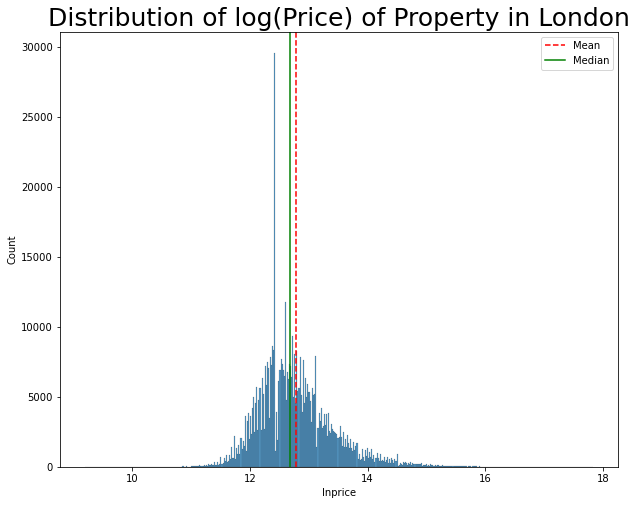

In [7]:
print('Lowest price: $' + str(df['lnprice'].min()))
print('Highest price: $' + str(df['lnprice'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of log(Price) of Property in London',fontdict = {'fontsize': 25 })
mean=df['lnprice'].mean()
median=df['lnprice'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['lnprice'])
plt.ticklabel_format(style='plain', axis='x')

#looks much better after log transformation on price. 

In [8]:
df.isnull().sum()

price                      0
postalcode                 0
propertyty                 0
age                        0
duration                   0
year                       0
month                      0
day                        0
OA01CD                     0
OA11CD                     0
lsoacode                   0
msoa11                     0
transactiondates           0
quarter                    0
yearquarter                0
bus_distnear               0
tube_distnear              0
thamesriv_dist             0
Bus_stopscount_200m        0
percent_noedu              7
percent_minorities         7
lone_hh                    7
detached_dum               0
flat_dum                   0
semi_d_dum                 0
terrace_dum                0
freehold                   0
leasehold                  0
heritage_count_200m        0
Nearest_Park_dist          0
postcode                   0
oslaua                     0
lat                        0
lon                        0
LA            

In [9]:
def function(x):
    if x == 'Y':
        return 1 
    else:
        return 0 
    
df['newbuild'] = df['age'].apply(function)

def function2(x):
    if x <= 500:
        return 1 
    else:
        return 0 

def function3(x):
    if x <= 1000:
        return 1 
    else:
        return 0 

df['tube_near'] = df['tube_distnear'].apply(function2)
df['Nearest_park'] = df['Nearest_Park_dist'].apply(function2)
df['thamesriv'] = df['thamesriv_dist'].apply(function3)
df['populationdensity'] = df['totalpopulation'] / df['hectares']

#variables preprocessing for regression

# Variables of interest - allcrime, violentcrime and propertycrime 

Lets take a look at their distribution 

Lowest number of crime: 1
Highest number of crime: 9225
Lowest number of violent crime: 0
Highest number of violent crime: 1098
Lowest number of property crime: 0
Highest number of property crime: 389


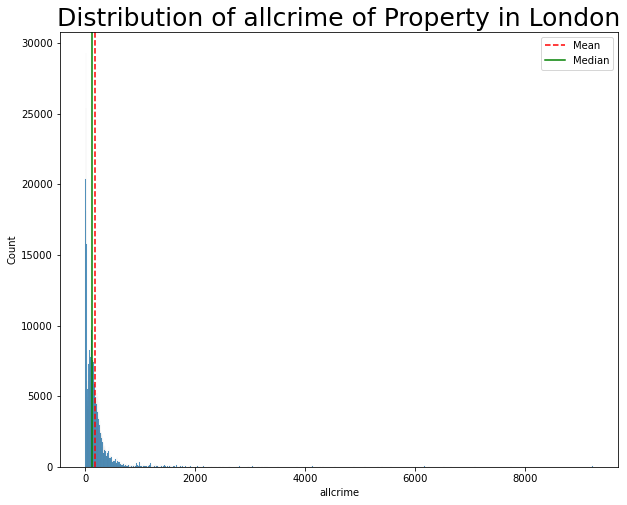

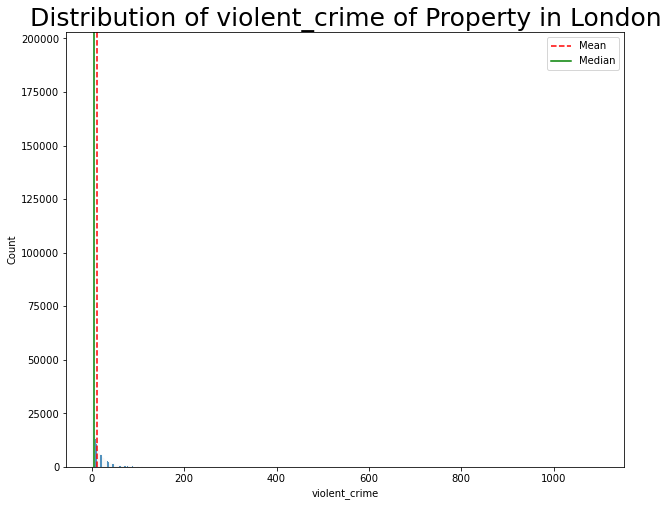

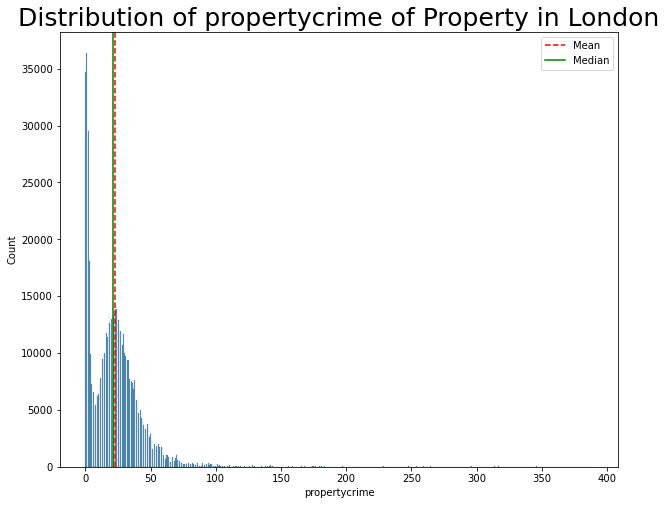

In [10]:
print('Lowest number of crime: ' + str(df['allcrime'].min()))
print('Highest number of crime: ' + str(df['allcrime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of allcrime of Property in London',fontdict = {'fontsize': 25 })
mean=df['allcrime'].mean()
median=df['allcrime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['allcrime'])
plt.ticklabel_format(style='plain', axis='x')



print('Lowest number of violent crime: ' + str(df['violent_crime'].min()))
print('Highest number of violent crime: ' + str(df['violent_crime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of violent_crime of Property in London',fontdict = {'fontsize': 25 })
mean=df['violent_crime'].mean()
median=df['violent_crime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['violent_crime'])
plt.ticklabel_format(style='plain', axis='x')


print('Lowest number of property crime: ' + str(df['propertycrime'].min()))
print('Highest number of property crime: ' + str(df['propertycrime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of propertycrime of Property in London',fontdict = {'fontsize': 25 })
mean=df['propertycrime'].mean()
median=df['propertycrime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['propertycrime'])
plt.ticklabel_format(style='plain', axis='x')

#positive skewed and right-tailed. we will attempt log transformation on the variable of interest as well. 

It is important to note that for violent_crime and property crime, the lowest count is 0. taking log transformation on them will result in an error showing -inf in the dataset. We will drop these entries for the regression. 

In [12]:
df['logallcrime'] = ln(df['allcrime'])
df['logviolent_crime'] = ln(df['violent_crime'])
df['log_propertycrime'] = ln(df['propertycrime'])

#the warning is hinting that there might be unknown values (-inf) within these columns. 

C:\Users\kentj\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df1 = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna() 
#converting the inf values to np.nan, then drop the np.nan values

Lowest number of crime: 0.0
Highest number of crime: 9.129672050476074
Lowest number of violent crime: 0.0
Highest number of violent crime: 7.001245498657227
Lowest number of property crime: 0.0
Highest number of property crime: 5.963579177856445


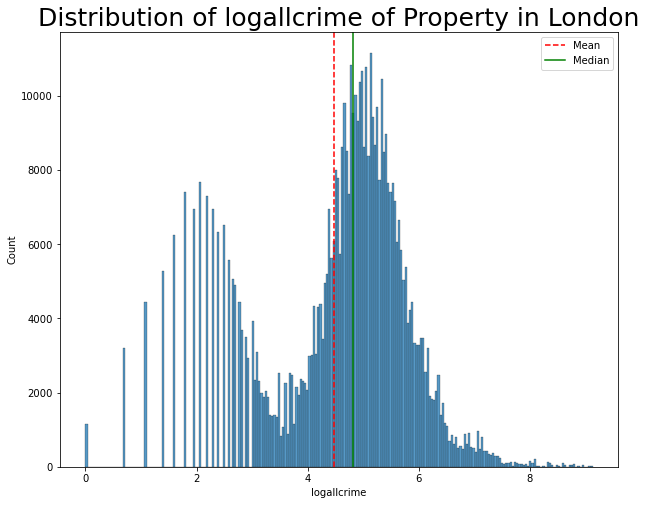

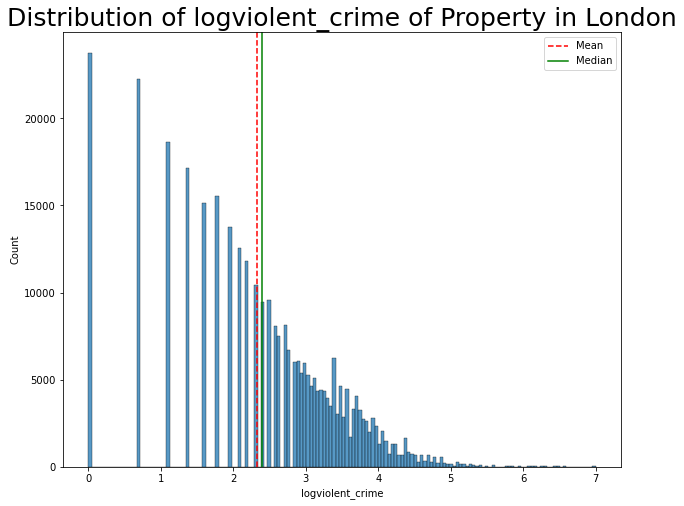

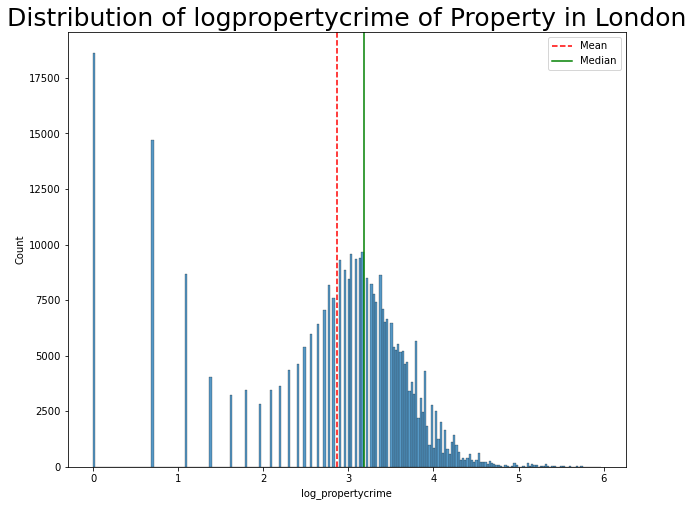

In [14]:
print('Lowest number of crime: ' + str(df['logallcrime'].min()))
print('Highest number of crime: ' + str(df['logallcrime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of logallcrime of Property in London',fontdict = {'fontsize': 25 })
mean=df['logallcrime'].mean()
median=df['logallcrime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df['logallcrime'])
plt.ticklabel_format(style='plain', axis='x')


print('Lowest number of violent crime: ' + str(df1['logviolent_crime'].min()))
print('Highest number of violent crime: ' + str(df1['logviolent_crime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of logviolent_crime of Property in London',fontdict = {'fontsize': 25 })
mean=df1['logviolent_crime'].mean()
median=df1['logviolent_crime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df1['logviolent_crime'])
plt.ticklabel_format(style='plain', axis='x')


print('Lowest number of property crime: ' + str(df1['log_propertycrime'].min()))
print('Highest number of property crime: ' + str(df1['log_propertycrime'].max()))

plt.figure(figsize= (10, 8))
plt.title('Distribution of logpropertycrime of Property in London',fontdict = {'fontsize': 25 })
mean=df1['log_propertycrime'].mean()
median=df1['log_propertycrime'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.histplot(df1['log_propertycrime'])
plt.ticklabel_format(style='plain', axis='x')

The variable of interests - all 3 crime rates are now normalized and ready for regression. 

In [15]:
corr = df[['logallcrime', 'logviolent_crime', 'log_propertycrime', 'lnprice']].corr()
corr.style.background_gradient(cmap='coolwarm')

#Things to note - High correlations between 3 different property crime rates. Hence we are unable to use all of them in our regressions. 


,logallcrime,logviolent_crime,log_propertycrime,lnprice
logallcrime,1.000000,0.803020,0.891236,-0.010144
logviolent_crime,0.803020,1.000000,0.613953,-0.094314
log_propertycrime,0.891236,0.613953,1.000000,-0.003768
lnprice,-0.010144,-0.094314,-0.003768,1.000000


## Stage 1 Regression: Structural Characteristics - Includes variables pertaining to Housing Characteristics 

We want to create the base regression, where it should include include variables pertaining to Housing Characteristics and variable of interest. Thus the mathematical equation will be: 

lnPrice = β0 + β1(semi_d_dum) + β2(terrace_dum) + β3(detached_dum) + β4(newbuild) + β5(freehold) + β6(variable of interest) + u   
where variable of interest = logallcrime, logviolent_crime or log_propertycrime 

In [16]:
exog_vars = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'logallcrime']
exog = sm.add_constant(df[exog_vars])
mod = sm.OLS(df['lnprice'], exog)
reg = mod.fit(cov_type = 'HC1')
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7116.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:06   Log-Likelihood:            -5.1296e+05
No. Observations:              549813   AIC:                         1.026e+06
Df Residuals:                  549806   BIC:                         1.026e+06
Df Model:                           6                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.5745      0.003   4068.592      0.000      12.568      12.581
semi_d_dum       0.1469      0.008     18.357      0.000       0.131       0.163
terrace_dum      0.1106      0.008     14.098      0.000       0.095       0.126
detached_dum     0.6111      0.009     69.756      0.000       0.594       0.628
newbuild         0.0639      0.003     22.831      0.000       0.058       0.069
freehold         0.1170      0.008     14.959      0.000       0.102       0.132
logallcrime      0.0140      0.001     21.978      0.000       0.013       0.015
==============================================================================
Omnibus:                   102975.298   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           227998.019
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       5.286   Cond. No.                         78.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [17]:
exog_vars1 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'logviolent_crime']
exog1 = sm.add_constant(df1[exog_vars1])
mod1 = sm.OLS(df1['lnprice'], exog1)
reg1 = mod1.fit(cov_type = 'HC1')
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4649.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:10   Log-Likelihood:            -3.0792e+05
No. Observations:              335119   AIC:                         6.159e+05
Df Residuals:                  335112   BIC:                         6.159e+05
Df Model:                           6                                         
Covariance Type:                  HC1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.6793      0.003   4638.533      0.000      12.674      12.685
semi_d_dum           0.1242      0.010     12.809      0.000       0.105       0.143
terrace_dum          0.0993      0.009     10.462      0.000       0.081       0.118
detached_dum         0.5869      0.011     54.758      0.000       0.566       0.608
newbuild             0.0424      0.003     13.014      0.000       0.036       0.049
freehold             0.1172      0.009     12.401      0.000       0.099       0.136
logviolent_crime    -0.0396      0.001    -42.296      0.000      -0.041      -0.038
==============================================================================
Omnibus:                    69770.395   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166842.389
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       5.549   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [18]:
exog_vars2 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'log_propertycrime']
exog2 = sm.add_constant(df1[exog_vars2])
mod2 = sm.OLS(df1['lnprice'], exog2)
reg2 = mod2.fit(cov_type = 'HC1')
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:12   Log-Likelihood:            -3.0829e+05
No. Observations:              335119   AIC:                         6.166e+05
Df Residuals:                  335112   BIC:                         6.167e+05
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4885      0.003   4012.721      0.000      12.482      12.495
semi_d_dum            0.1355      0.010     13.995      0.000       0.117       0.155
terrace_dum           0.0995      0.009     10.500      0.000       0.081       0.118
detached_dum          0.6062      0.011     56.578      0.000       0.585       0.627
newbuild              0.0258      0.003      7.930      0.000       0.019       0.032
freehold              0.1251      0.009     13.255      0.000       0.107       0.144
log_propertycrime     0.0328      0.001     34.188      0.000       0.031       0.035
==============================================================================
Omnibus:                    68209.183   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160111.373
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.485   Cond. No.                         51.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### Obviously omitted variable bias in the this particular model. Positive coefficients between logallcrime and lnprice, indicating that for every 1% increase in all crime rates will result in an increase of 0.014% of the housing price. - which obviously doesn't make sense!

# Stage 2 - Neighbourhood Characteristics - Peer Effects and Ammenities 

We will now further built on the model with Ammenities and peer effects. The mathematical equation now becomes: 

Ammenities: 

lnPrice = β0 + β1(semi_d_dum) + β2(terrace_dum) + β3(detached_dum) + β4(newbuild) + β5(freehold) +  β6(Bus_stopscount_200m) +  β7(tube_near) + β8(heritage_count_200m)+ β9(thamesriv) + β10(Nearest_park) + β11(variable of interest) + u


Peer Effects: 

lnPrice = β0 + β1(semi_d_dum) + β2(terrace_dum) + β3(detached_dum) + β4(newbuild) + β5(freehold) +  β6(Bus_stopscount_200m) +  β7(tube_near) + β8(heritage_count_200m)+ β9(thamesriv) + β10(Nearest_park) +  β11(percent_noedu) + β12(percent_minorities) +  β13(lone_hh) + β11(variable of interest) + u


where variable of interest = logallcrime, logviolent_crime or log_propertycrime

## Ammenities

In [19]:
exog_vars3 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'logallcrime']
exog3 = sm.add_constant(df[exog_vars3])
mod3 = sm.OLS(df['lnprice'], exog3)
reg3 = mod3.fit(cov_type = 'HC1')
reg3.summary()

#logallcrime turned negative here 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 1.099e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:18   Log-Likelihood:            -4.6842e+05
No. Observations:              549813   AIC:                         9.369e+05
Df Residuals:                  549801   BIC:                         9.370e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.4616      0.003   4147.822      0.000      12.456      12.467
semi_d_dum              0.2336      0.007     32.000      0.000       0.219       0.248
terrace_dum             0.1608      0.007     22.542      0.000       0.147       0.175
detached_dum            0.6942      0.008     85.921      0.000       0.678       0.710
newbuild                0.0113      0.003      4.239      0.000       0.006       0.017
freehold                0.1710      0.007     24.055      0.000       0.157       0.185
Bus_stopscount_200m    -0.0014      0.000     -3.544      0.000      -0.002      -0.001
tube_near               0.3484      0.002    154.156      0.000       0.344       0.353
heritage_count_200m     0.1315      0.004     36.614      0.000       0.124       0.139
thamesriv               0.2718      0.003    104.662      0.000       0.267       0.277
Nearest_park            0.5406      0.005    111.926      0.000       0.531       0.550
logallcrime            -0.0047      0.001     -8.102      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    81990.332   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171831.457
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                       5.056   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [20]:
exog_vars4 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'logviolent_crime']
exog4 = sm.add_constant(df1[exog_vars4])
mod4 = sm.OLS(df1['lnprice'], exog4)
reg4 = mod4.fit(cov_type = 'HC1')
reg4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7347.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:22   Log-Likelihood:            -2.7810e+05
No. Observations:              335119   AIC:                         5.562e+05
Df Residuals:                  335107   BIC:                         5.564e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.4981      0.003   4454.459      0.000      12.493      12.504
semi_d_dum              0.2153      0.009     24.503      0.000       0.198       0.232
terrace_dum             0.1502      0.009     17.500      0.000       0.133       0.167
detached_dum            0.6727      0.010     68.328      0.000       0.653       0.692
newbuild               -0.0076      0.003     -2.424      0.015      -0.014      -0.001
freehold                0.1787      0.009     20.915      0.000       0.162       0.195
Bus_stopscount_200m     0.0014      0.001      2.807      0.005       0.000       0.002
tube_near               0.3542      0.003    126.862      0.000       0.349       0.360
heritage_count_200m     0.1552      0.005     30.057      0.000       0.145       0.165
thamesriv               0.2789      0.003     86.085      0.000       0.273       0.285
Nearest_park            0.5276      0.006     86.236      0.000       0.516       0.540
logviolent_crime       -0.0537      0.001    -63.014      0.000      -0.055      -0.052
==============================================================================
Omnibus:                    54992.591   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123792.768
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [21]:
exog_vars5 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'log_propertycrime']
exog5 = sm.add_constant(df1[exog_vars5])
mod5 = sm.OLS(df1['lnprice'], exog5)
reg5 = mod5.fit(cov_type = 'HC1')
reg5.summary()

#propertycrime still remains positive. we continue to add in variables to attempt to remove omitted variable bias. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     6974.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:25   Log-Likelihood:            -2.7969e+05
No. Observations:              335119   AIC:                         5.594e+05
Df Residuals:                  335107   BIC:                         5.595e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.3048      0.003   3855.266      0.000      12.299      12.311
semi_d_dum              0.2259      0.009     25.635      0.000       0.209       0.243
terrace_dum             0.1480      0.009     17.190      0.000       0.131       0.165
detached_dum            0.6933      0.010     70.129      0.000       0.674       0.713
newbuild               -0.0261      0.003     -8.329      0.000      -0.032      -0.020
freehold                0.1859      0.009     21.692      0.000       0.169       0.203
Bus_stopscount_200m    -0.0024      0.001     -4.682      0.000      -0.003      -0.001
tube_near               0.3469      0.003    123.917      0.000       0.341       0.352
heritage_count_200m     0.1386      0.005     27.837      0.000       0.129       0.148
thamesriv               0.2813      0.003     86.098      0.000       0.275       0.288
Nearest_park            0.5281      0.006     86.529      0.000       0.516       0.540
log_propertycrime       0.0265      0.001     30.398      0.000       0.025       0.028
==============================================================================
Omnibus:                    54678.304   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121937.380
Skew:                           0.956   Prob(JB):                         0.00
Kurtosis:                       5.253   Cond. No.                         66.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

## Peers Effect

In [22]:
exog_vars6 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'logallcrime']
exog6 = sm.add_constant(df[exog_vars6])
mod6 = sm.OLS(df['lnprice'], exog6, missing = 'drop')
reg6 = mod6.fit(cov_type = 'HC1')
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 1.971e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:29   Log-Likelihood:            -3.9854e+05
No. Observations:              549806   AIC:                         7.971e+05
Df Residuals:                  549791   BIC:                         7.973e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0031      0.003   4361.542      0.000      12.997      13.009
semi_d_dum              0.2111      0.007     32.386      0.000       0.198       0.224
terrace_dum             0.1772      0.006     27.756      0.000       0.165       0.190
detached_dum            0.5637      0.007     77.470      0.000       0.549       0.578
newbuild                0.1214      0.003     45.832      0.000       0.116       0.127
freehold                0.2350      0.006     36.926      0.000       0.223       0.247
Bus_stopscount_200m     0.0017      0.000      4.770      0.000       0.001       0.002
tube_near               0.2715      0.002    134.037      0.000       0.268       0.276
heritage_count_200m     0.0936      0.003     28.621      0.000       0.087       0.100
thamesriv               0.1269      0.002     55.158      0.000       0.122       0.131
Nearest_park            0.3790      0.005     83.429      0.000       0.370       0.388
percent_noedu          -2.4767      0.009   -263.948      0.000      -2.495      -2.458
percent_minorities     -0.4224      0.004   -120.472      0.000      -0.429      -0.416
lone_hh                -1.1805      0.015    -81.303      0.000      -1.209      -1.152
logallcrime             0.0097      0.001     18.437      0.000       0.009       0.011
==============================================================================
Omnibus:                    83315.424   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207417.368
Skew:                           0.859   Prob(JB):                         0.00
Kurtosis:                       5.471   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [23]:
exog_vars7 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'logviolent_crime']
exog7 = sm.add_constant(df1[exog_vars7])
mod7 = sm.OLS(df1['lnprice'], exog7, missing = 'drop')
reg7 = mod7.fit(cov_type = 'HC1')
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:33   Log-Likelihood:            -2.3327e+05
No. Observations:              335119   AIC:                         4.666e+05
Df Residuals:                  335104   BIC:                         4.667e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0137      0.003   4338.233      0.000      13.008      13.020
semi_d_dum              0.2000      0.008     25.669      0.000       0.185       0.215
terrace_dum             0.1630      0.008     21.382      0.000       0.148       0.178
detached_dum            0.5523      0.009     62.641      0.000       0.535       0.570
newbuild                0.1102      0.003     35.252      0.000       0.104       0.116
freehold                0.2526      0.008     33.259      0.000       0.238       0.267
Bus_stopscount_200m     0.0029      0.000      6.518      0.000       0.002       0.004
tube_near               0.2832      0.002    113.398      0.000       0.278       0.288
heritage_count_200m     0.1169      0.005     25.408      0.000       0.108       0.126
thamesriv               0.1324      0.003     46.172      0.000       0.127       0.138
Nearest_park            0.3778      0.006     66.043      0.000       0.367       0.389
percent_noedu          -2.5003      0.012   -212.281      0.000      -2.523      -2.477
percent_minorities     -0.4495      0.004   -103.358      0.000      -0.458      -0.441
lone_hh                -1.1641      0.018    -64.059      0.000      -1.200      -1.129
logviolent_crime       -0.0129      0.001    -16.924      0.000      -0.014      -0.011
==============================================================================
Omnibus:                    57612.257   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160810.182
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                       5.845   Cond. No.                         95.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [24]:
exog_vars8 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'log_propertycrime']
exog8 = sm.add_constant(df1[exog_vars8])
mod8 = sm.OLS(df1['lnprice'], exog8, missing = 'drop')
reg8 = mod8.fit(cov_type = 'HC1')
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.318e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:36   Log-Likelihood:            -2.3256e+05
No. Observations:              335119   AIC:                         4.651e+05
Df Residuals:                  335104   BIC:                         4.653e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.9018      0.003   3800.412      0.000      12.895      12.908
semi_d_dum              0.2021      0.008     25.954      0.000       0.187       0.217
terrace_dum             0.1621      0.008     21.273      0.000       0.147       0.177
detached_dum            0.5552      0.009     62.948      0.000       0.538       0.572
newbuild                0.1047      0.003     33.661      0.000       0.099       0.111
freehold                0.2564      0.008     33.779      0.000       0.242       0.271
Bus_stopscount_200m     0.0018      0.000      3.934      0.000       0.001       0.003
tube_near               0.2805      0.002    112.484      0.000       0.276       0.285
heritage_count_200m     0.1086      0.004     24.148      0.000       0.100       0.117
thamesriv               0.1325      0.003     46.279      0.000       0.127       0.138
Nearest_park            0.3741      0.006     65.572      0.000       0.363       0.385
percent_noedu          -2.5064      0.012   -213.141      0.000      -2.529      -2.483
percent_minorities     -0.4615      0.004   -107.441      0.000      -0.470      -0.453
lone_hh                -1.2075      0.018    -66.534      0.000      -1.243      -1.172
log_propertycrime       0.0322      0.001     42.309      0.000       0.031       0.034
==============================================================================
Omnibus:                    57596.410   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161244.801
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       5.852   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Stage 3 - Neighbourhood Characteristics - Location Characteristics

We will expand our model with Location Characteristics. The mathematical equation now becomes: 

lnPrice = β0 + β1(semi_d_dum) + β2(terrace_dum) + β3(detached_dum) + β4(newbuild) + β5(freehold) +  β6(Bus_stopscount_200m) +  β7(tube_near) + β8(heritage_count_200m)+ β9(thamesriv) + β10(Nearest_park) +  β11(percent_noedu) + β12(percent_minorities) +  β13(lone_hh) + β14(populationdensity) + β15(unemployment) + β16(jobdensity) + β17(dist_to_cbd) + β18(variable of interest) + β19(variable of interest)  + u

where variable of interest = logallcrime, logviolent_crime or log_propertycrime

In [25]:
corr1 = df[['lnprice', 'grossannualpay', 'hoursworked', 'jobdensity', 'totalpopulation', 'unemployment', 'dist_to_cbd', 'populationdensity']].corr()
corr1.style.background_gradient(cmap='coolwarm')

,lnprice,grossannualpay,hoursworked,jobdensity,totalpopulation,unemployment,dist_to_cbd,populationdensity
lnprice,1.000000,0.210431,0.025066,0.102509,-0.177796,-0.236005,-0.390516,0.304202
grossannualpay,0.210431,1.000000,-0.649378,0.353042,-0.166391,0.285888,-0.519986,0.602763
hoursworked,0.025066,-0.649378,1.000000,-0.203626,-0.074156,-0.340377,0.203100,-0.247365
jobdensity,0.102509,0.353042,-0.203626,1.000000,-0.279625,-0.057933,-0.157344,-0.002545
totalpopulation,-0.177796,-0.166391,-0.074156,-0.279625,1.000000,0.174975,0.092636,-0.160824
unemployment,-0.236005,0.285888,-0.340377,-0.057933,0.174975,1.000000,-0.145205,0.253796
dist_to_cbd,-0.390516,-0.519986,0.203100,-0.157344,0.092636,-0.145205,1.000000,-0.825617
populationdensity,0.304202,0.602763,-0.247365,-0.002545,-0.160824,0.253796,-0.825617,1.000000


from here we can see the correlation between all of the variables against housing price. and generally we want to keep the higher correlations one. I am dropping the last 3 variables with the lowest correlations. annualgrosssalary here is highly correlated with hoursworked, jobdensity and dist_to_cbd. Hence i am dropping grosssalary to prevent multicolinearity. hoursworked is only 3% correlated to lnprice. hence I am dropping it.Total population may not be a accurate variable to predict housing price. it ultimately depends on the size area of the LAD level. I think the proper variable should be population density. Hence I am not including it.

In [26]:
exog_vars9 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'populationdensity', 'unemployment', 'jobdensity', 'dist_to_cbd', 'logallcrime']
exog9 = sm.add_constant(df[exog_vars9])
mod9 = sm.OLS(df['lnprice'], exog9, missing = 'drop')
reg9 = mod9.fit(cov_type = 'HC1')
reg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 2.816e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:48   Log-Likelihood:            -2.5649e+05
No. Observations:              499386   AIC:                         5.130e+05
Df Residuals:                  499367   BIC:                         5.132e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.3360      0.005   2650.417      0.000      13.326      13.346
semi_d_dum              0.3715      0.006     64.146      0.000       0.360       0.383
terrace_dum             0.2173      0.006     38.331      0.000       0.206       0.228
detached_dum            0.7728      0.007    116.800      0.000       0.760       0.786
newbuild                0.2050      0.002     91.104      0.000       0.201       0.209
freehold                0.3311      0.006     58.567      0.000       0.320       0.342
Bus_stopscount_200m    -0.0137      0.000    -43.931      0.000      -0.014      -0.013
tube_near               0.0868      0.002     49.504      0.000       0.083       0.090
heritage_count_200m     0.0220      0.003      6.435      0.000       0.015       0.029
thamesriv               0.0672      0.002     34.028      0.000       0.063       0.071
Nearest_park            0.1978      0.004     50.099      0.000       0.190       0.206
percent_noedu          -1.3935      0.008   -168.392      0.000      -1.410      -1.377
percent_minorities     -0.4754      0.003   -150.819      0.000      -0.482      -0.469
lone_hh                -1.0764      0.013    -85.822      0.000      -1.101      -1.052
populationdensity       0.0031   3.49e-05     89.664      0.000       0.003       0.003
unemployment           -0.0522      0.000   -179.625      0.000      -0.053      -0.052
jobdensity              0.1268      0.001     91.893      0.000       0.124       0.129
dist_to_cbd            -0.0365      0.000   -178.823      0.000      -0.037      -0.036
logallcrime             0.0191      0.000     38.630      0.000       0.018       0.020
==============================================================================
Omnibus:                    60294.026   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236541.150
Skew:                           0.565   Prob(JB):                         0.00
Kurtosis:                       6.176   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
exog_vars10 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'populationdensity', 'unemployment', 'jobdensity', 'dist_to_cbd', 'logviolent_crime']
exog10 = sm.add_constant(df1[exog_vars10])
mod10 = sm.OLS(df1['lnprice'], exog10, missing = 'drop')
reg10 = mod10.fit(cov_type = 'HC1')
reg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 1.873e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:52   Log-Likelihood:            -1.6830e+05
No. Observations:              335119   AIC:                         3.366e+05
Df Residuals:                  335100   BIC:                         3.369e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.3138      0.006   2343.960      0.000      13.303      13.325
semi_d_dum              0.3586      0.007     53.092      0.000       0.345       0.372
terrace_dum             0.2019      0.007     30.561      0.000       0.189       0.215
detached_dum            0.7570      0.008     97.067      0.000       0.742       0.772
newbuild                0.2138      0.003     80.952      0.000       0.209       0.219
freehold                0.3444      0.007     52.304      0.000       0.332       0.357
Bus_stopscount_200m    -0.0111      0.000    -29.757      0.000      -0.012      -0.010
tube_near               0.0913      0.002     43.627      0.000       0.087       0.095
heritage_count_200m     0.0258      0.004      6.603      0.000       0.018       0.033
thamesriv               0.0625      0.002     26.279      0.000       0.058       0.067
Nearest_park            0.2024      0.005     42.485      0.000       0.193       0.212
percent_noedu          -1.4257      0.010   -143.136      0.000      -1.445      -1.406
percent_minorities     -0.4984      0.004   -130.351      0.000      -0.506      -0.491
lone_hh                -1.0016      0.015    -66.435      0.000      -1.031      -0.972
populationdensity       0.0029   4.28e-05     67.783      0.000       0.003       0.003
unemployment           -0.0365      0.000    -97.149      0.000      -0.037      -0.036
jobdensity              0.1349      0.002     81.758      0.000       0.132       0.138
dist_to_cbd            -0.0363      0.000   -146.340      0.000      -0.037      -0.036
logviolent_crime       -0.0207      0.001    -32.526      0.000      -0.022      -0.019
==============================================================================
Omnibus:                    44965.140   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179964.895
Skew:                           0.629   Prob(JB):                         0.00
Kurtosis:                       6.363   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
exog_vars11 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 
             'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities',
              'lone_hh', 'populationdensity', 'unemployment', 'jobdensity', 'dist_to_cbd', 'log_propertycrime']
exog11 = sm.add_constant(df1[exog_vars11])
mod11 = sm.OLS(df1['lnprice'], exog11, missing = 'drop')
reg11 = mod11.fit(cov_type = 'HC1')
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 1.874e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:58   Log-Likelihood:            -1.6824e+05
No. Observations:              335119   AIC:                         3.365e+05
Df Residuals:                  335100   BIC:                         3.367e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.2318      0.006   2272.520      0.000      13.220      13.243
semi_d_dum              0.3602      0.007     53.210      0.000       0.347       0.374
terrace_dum             0.2010      0.007     30.333      0.000       0.188       0.214
detached_dum            0.7602      0.008     97.181      0.000       0.745       0.776
newbuild                0.2078      0.003     79.025      0.000       0.203       0.213
freehold                0.3476      0.007     52.655      0.000       0.335       0.361
Bus_stopscount_200m    -0.0126      0.000    -33.730      0.000      -0.013      -0.012
tube_near               0.0903      0.002     43.076      0.000       0.086       0.094
heritage_count_200m     0.0181      0.004      4.676      0.000       0.011       0.026
thamesriv               0.0623      0.002     26.180      0.000       0.058       0.067
Nearest_park            0.1990      0.005     41.889      0.000       0.190       0.208
percent_noedu          -1.4374      0.010   -144.515      0.000      -1.457      -1.418
percent_minorities     -0.5106      0.004   -133.758      0.000      -0.518      -0.503
lone_hh                -1.0560      0.015    -70.041      0.000      -1.086      -1.026
populationdensity       0.0028   4.29e-05     66.095      0.000       0.003       0.003
unemployment           -0.0375      0.000   -100.630      0.000      -0.038      -0.037
jobdensity              0.1323      0.002     80.367      0.000       0.129       0.136
dist_to_cbd            -0.0365      0.000   -146.821      0.000      -0.037      -0.036
log_propertycrime       0.0224      0.001     35.730      0.000       0.021       0.024
==============================================================================
Omnibus:                    45037.016   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180676.368
Skew:                           0.629   Prob(JB):                         0.00
Kurtosis:                       6.370   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Fixed Effects Model 
- Since this is a Time Series data, we need to account for the price differences due to time and entity(eg. location) 
we will add in the fixed effects regression, hence the model now becomes: 

lnPrice = β0 + β1(semi_d_dum) + β2(terrace_dum) + β3(detached_dum) + β4(newbuild) + β5(freehold) +  β6(Bus_stopscount_200m) +  β7(tube_near) + β8(heritage_count_200m)+ β9(thamesriv) + β10(Nearest_park) +  β11(percent_noedu) + β12(percent_minorities) +  β13(lone_hh) + β14(populationdensity) + β15(unemployment) + β16(jobdensity) + β17(dist_to_cbd) + β18(variable of interest) + β19(variable of interest) + δ2B2t + ... + δTBTt + γ2D2i + ... + γnDTi + u

where δ2B2t + ... + δTBTt = TimeFixedEffects and γ2D2i + ... + γnDTi = entityfixedeffects 

here, we will set our entity to be la_name as it is the smaller scope as compared to msoa or lsoa. 
year is taken as the time fixed effects 

## Interaction Variable 
I suspect there is a difference between freehold and leasehold housing prices, even when their crimerates are taken constant. 


In [29]:
df = df.set_index(['la_name', 'year']) 
df1 = df1.set_index(['la_name', 'year']) 

In [30]:
df['freeholdallcrime'] = df['freehold'] * df['logallcrime']
df['freeholdviolentcrime'] = df['freehold'] * df['logviolent_crime']
df['freeholdpropertycrime'] = df['freehold'] * df['log_propertycrime']

df1['freeholdallcrime'] = df1['freehold'] * df1['logallcrime']
df1['freeholdviolentcrime'] = df1['freehold'] * df1['logviolent_crime']
df1['freeholdpropertycrime'] = df1['freehold'] * df1['log_propertycrime']

In [31]:
from linearmodels.panel import PanelOLS

exog_vars12 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 'tube_near', 
               'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities', 'lone_hh', 
               'unemployment', 'populationdensity', 'jobdensity', 'dist_to_cbd', 'freeholdallcrime', 'logallcrime']
exog12 = sm.add_constant(df[exog_vars12])
mod12 = PanelOLS(df.lnprice, exog12, time_effects = True, entity_effects = True, check_rank = False, drop_absorbed = True)
fe_te_res = mod12.fit(cov_type = 'robust', cluster_entity = True)
print(fe_te_res)

C:\Users\kentj\anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                lnprice   R-squared:                        0.5053
Estimator:                   PanelOLS   R-squared (Between):              0.2361
No. Observations:              499386   R-squared (Within):               0.4799
Date:                Sat, Sep 04 2021   R-squared (Overall):              0.3636
Time:                        03:41:25   Log-likelihood                -2.156e+05
Cov. Estimator:                Robust                                           
                                        F-statistic:                   2.684e+04
Entities:                          33   P-value                           0.0000
Avg Obs:                    1.513e+04   Distribution:               F(19,499330)
Min Obs:                       1.0000                                           
Max Obs:                    2.785e+04   F-statistic (robust):          2.329e+04
                            

In [32]:
from linearmodels.panel import PanelOLS
exog_vars13 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities', 'lone_hh', 'unemployment', 'populationdensity', 'jobdensity', 'dist_to_cbd', 'freeholdviolentcrime', 'logviolent_crime']
exog13 = sm.add_constant(df1[exog_vars13])
mod13 = PanelOLS(df1.lnprice, exog13, time_effects = True, entity_effects = True, check_rank = False, drop_absorbed = True)
fe_te_res1 = mod13.fit(cov_type = 'robust', cluster_entity = True)
print(fe_te_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lnprice   R-squared:                        0.5066
Estimator:                   PanelOLS   R-squared (Between):              0.2067
No. Observations:              335119   R-squared (Within):               0.5021
Date:                Sat, Sep 04 2021   R-squared (Overall):              0.3607
Time:                        03:41:33   Log-likelihood                -1.426e+05
Cov. Estimator:                Robust                                           
                                        F-statistic:                   1.811e+04
Entities:                          33   P-value                           0.0000
Avg Obs:                    1.016e+04   Distribution:               F(19,335064)
Min Obs:                       1.0000                                           
Max Obs:                    1.882e+04   F-statistic (robust):          1.556e+04
                            

In [33]:
from linearmodels.panel import PanelOLS
exog_vars14 = ['semi_d_dum', 'terrace_dum', 'detached_dum', 'newbuild', 'freehold', 'Bus_stopscount_200m', 'tube_near', 'heritage_count_200m', 'thamesriv', 'Nearest_park', 'percent_noedu', 'percent_minorities', 'lone_hh', 'unemployment', 'populationdensity', 'jobdensity', 'dist_to_cbd', 'freeholdpropertycrime', 'log_propertycrime']
exog14 = sm.add_constant(df1[exog_vars14])
mod14 = PanelOLS(df1.lnprice, exog14, time_effects = True, entity_effects = True, check_rank = False, drop_absorbed = True)
fe_te_res2 = mod14.fit(cov_type = 'robust', cluster_entity = True)
print(fe_te_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lnprice   R-squared:                        0.5041
Estimator:                   PanelOLS   R-squared (Between):              0.2457
No. Observations:              335119   R-squared (Within):               0.4964
Date:                Sat, Sep 04 2021   R-squared (Overall):              0.3714
Time:                        03:42:02   Log-likelihood                -1.435e+05
Cov. Estimator:                Robust                                           
                                        F-statistic:                   1.793e+04
Entities:                          33   P-value                           0.0000
Avg Obs:                    1.016e+04   Distribution:               F(19,335064)
Min Obs:                       1.0000                                           
Max Obs:                    1.882e+04   F-statistic (robust):          1.535e+04
                            